# 100_load_videogame_datasets

### Purpose

In this notebook we will be loading in one of our games datasets and cleaning it. We will focus on deleting unnecessary columns and handling null values.

# Datasets 

- Input : Games_Sales_Totals.csv
- Output : Clean_Game_Sales_Total.pkl, Clean_Games_sales_1996-2016.pkl 

Importing the required libraries in order to open the dataset later

In [1]:
import os
import pandas as pd 
import matplotlib.pylab as plt 

%matplotlib inline 

In [2]:
# check the path exists otherwise produce an error
if not os.path.exists("../../data/raw/Games_Sales_Totals.csv"):
    print("Missing Dataset File")

## Loading the Dataset and initial observations

The datasets are all saved in a standard .csv format so we will open the datasets as follows

In [3]:
# use shape to see the number of columns and rows
videogames = pd.read_csv("../../data/raw/Games_Sales_Totals.csv")
videogames.shape

(16719, 16)

I have just loaded in our main dataset which stores the games from the last 30 years and stored it in a variable called videogame.

The shape function is particularly useful as it will show us exactly how many rows and columns we are dealing with. In our case here we are dealing with 16719 rows and 16 different columns 

In [4]:
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


As seen above we are printing the first 5 lines to make sure the data was inputted in correctly and it also gives us a quick overview of the data

In [5]:
# group the year of release with year of release and count the number of games release per year
videogames.groupby('Year_of_Release')['Year_of_Release'].count()

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

The above shows the total times a certain year comes up in the dataset. Two years 2017 and 2020 should not appear so these rows will need to be deleted.

## Deleting unnecessary rows and columns

Some of the columns which contain critic and user scores are not neede. This is because they are incomplete and we have another dataset with the data complete.

In [6]:
# deleting unecessary columns
del videogames['Critic_Score']
del videogames['Critic_Count']
del videogames['User_Score']
del videogames['User_Count']
del videogames['Rating']
videogames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Nintendo
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN


Now to delete the rows as mentioned above since they are not supposed to be part of the dataset

In [7]:
# fault witht the dataset getting results for 2017 and 2020 and group it again so these arent included
videogames = videogames[videogames.Year_of_Release != 2017]
videogames = videogames[videogames.Year_of_Release != 2020]
videogames.groupby('Year_of_Release')['Year_of_Release'].count()

Year_of_Release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: Year_of_Release, dtype: int64

In [8]:
# check the unique platforms
videogames["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

## Splitting database

Splitting the database from 1996 to 2016 so it can be joined with our other dataaset later. 

In [9]:
videogame2 = videogames[(videogames.Year_of_Release >= 1996)]
videogame2.groupby('Year_of_Release')['Year_of_Release'].count()

Year_of_Release
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: Year_of_Release, dtype: int64

## Cleaning the main dataset.

Cleaning the full dataset so it is ready for analysis

In [10]:
# check for na values by summing the total amount of null values
videogames.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Developer          6620
dtype: int64

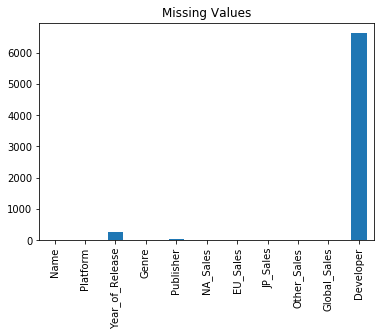

In [11]:
# graph the null values to see which ones have the highest nulls
videogames.isnull().sum().plot(kind='bar', title = 'Missing Values')

Deleting games withouth a name or year of release as these make it harder to analyse them. Leaving in null developers and publishers as in early years this data was not obtainable, also sometimes the publisher was the developer.

In [12]:
# dropping games with no release year
videogames = videogames.dropna(subset = ['Name', 'Year_of_Release' ])
videogames.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Developer          6538
dtype: int64

## Saving the Data

Saving the dataframes to pickle files as mentioned above.

In [13]:
# columns to save for pickle format later
cols = videogames.columns
cols1 = videogame2.columns

Saving to a pickle file

In [14]:
videogames[cols].to_pickle("../../data/prep/Clean_Games_Sales_Total.pkl")
videogame2[cols1].to_pickle("../../data/prep/Clean_Games_Sales_1996-2016.pkl")

In [15]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins', 'builtins', 'os', 'pandas', 'matplotlib.pylab', 'types']